# Introdução à Otimização de Hiperparâmetros

## Modelos em Aprendizado de Máquina
No mundo do aprendizado de máquina, um modelo é uma representação de um sistema. Ele é treinado usando um conjunto de dados e, com base nesse treinamento, faz previsões ou toma decisões sem ser explicitamente programado para realizar uma determinada tarefa.

In [1]:
from sklearn.linear_model import LogisticRegression

# Criando um modelo de Regressão Logística
modelo = LogisticRegression()

## Parâmetros vs Hiperparâmetros em Aprendizado de Máquina
Em aprendizado de máquina, o processo de treinamento envolve ajustar os parâmetros do modelo para melhor se adequar aos dados.

Em contraste, os hiperparâmetros são configurações que influenciam como esse treinamento é realizado.

### Parâmetros:
O que são? São componentes do modelo que são aprendidos diretamente dos dados durante o treinamento.

Exemplo: Nos modelos de redes neurais, os parâmetros são os pesos e biases (viés, um termo que adiciona um valor constante para ajudar o modelo a melhor se ajustar aos dados) que são ajustados através do treinamento.

In [2]:
# Carregando dataset do sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Carregando o dataset de dígitos
data = load_digits()
X = data.data
y = data.target

In [3]:
X.shape

(1797, 64)

In [4]:
y.shape

(1797,)

In [5]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
# Dividindo em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando uma rede neural simples
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilando e treinando o modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

In [7]:
# Mostrando alguns parâmetros (pesos) da primeira camada
weights_first_layer = model.layers[0].get_weights()[0]
print("Pesos da primeira camada:\n", weights_first_layer)

Pesos da primeira camada:
 [[ 2.35970974e-01  2.22717404e-01 -1.73478425e-02  1.20981961e-01]
 [-3.03625822e-01  2.76089907e-01 -7.62867108e-02  8.22396129e-02]
 [ 1.35030508e-01  1.33405775e-01  1.64373428e-01 -1.93287164e-01]
 [ 7.43474290e-02  1.61012188e-01  2.68446803e-01  1.90331236e-01]
 [ 3.63064036e-02 -2.41969466e-01  1.58104196e-01 -1.71689793e-01]
 [-8.13205838e-02 -2.65715867e-01  1.84297502e-01 -4.20588464e-01]
 [ 2.38132164e-01 -3.19437534e-02  1.15390398e-01 -3.04497659e-01]
 [-5.32458499e-02 -2.37964123e-01 -3.91666070e-02  5.63903637e-02]
 [ 1.78005069e-01  1.02853321e-01  9.95696113e-02 -3.78528237e-02]
 [-6.41883537e-02 -6.10585921e-02  2.70456910e-01  7.57134557e-02]
 [ 1.42446058e-02 -3.15530628e-01  1.66919351e-01 -2.69839823e-01]
 [-2.79495716e-01 -1.89650148e-01  3.12255342e-02  7.53245279e-02]
 [-8.34197402e-02  2.39526510e-01  1.77878425e-01  1.58396140e-01]
 [ 2.32123256e-01  6.97693527e-02 -1.25013679e-01  2.30162814e-02]
 [-1.79957002e-01 -2.84295738e-01 -

In [8]:
weights_first_layer.shape

(64, 4)

### Hiperparâmetros:
O que são? São configurações que definem aspectos do treinamento e da estrutura do modelo. Não são aprendidos nos dados, mas são configurados antes do treinamento.

Exemplo: Em redes neurais, a taxa de aprendizado, o número de camadas, o número de neurônios em uma camada, e a função de ativação são todos hiperparâmetros.

In [9]:
# Definindo hiperparâmetros para uma rede neural
learning_rate = 0.001
batch_size = 32
epochs = 50
number_of_neurons_layer1 = 128
number_of_neurons_layer2 = 64
number_of_neurons_layer3 = 128
activation_function = 'relu'

# Criando um modelo usando os hiperparâmetros
model = Sequential()
model.add(Dense(number_of_neurons_layer1, input_dim=X_train.shape[1], activation=activation_function))
model.add(Dense(number_of_neurons_layer2, activation=activation_function))
model.add(Dense(number_of_neurons_layer3, activation=activation_function))
model.add(Dense(10, activation='softmax'))

# Treinando o modelo usando os hiperparâmetros
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)


`learning_rate` = 0.001: Taxa de aprendizado é um hiperparâmetro que define o tamanho do passo que será usado no ajuste dos pesos durante o treinamento. Embora seja definido aqui, note que ele não está sendo usado diretamente no código fornecido, pois o otimizador 'adam' tem sua própria taxa de aprendizado adaptativa.

`batch_size` = 32: Tamanho do lote (ou batch) é a quantidade de amostras de dados que serão usadas para atualizar os pesos de uma única vez. Esse é um hiperparâmetro importante quando você está usando um método de otimização estocástico ou mini-batch.

`epochs` = 50: Número de épocas indica quantas vezes o algoritmo verá o conjunto de treinamento completo. Se você tem, digamos, 1000 amostras de treinamento e o batch_size é 100, então uma época terá 10 atualizações (passos) para o modelo.

`number_of_neurons_layer1` = 128 e `number_of_neurons_layer2` = 64 e `number_of_neurons_layer3` = 128: Estes definem o número de neurônios nas camadas ocultas da rede neural. A arquitetura e a profundidade da rede (número de camadas e neurônios em cada camada) são hiperparâmetros.

`activation_function` = 'relu': Função de ativação que é usada nos neurônios da rede. Dependendo da função escolhida, a rede pode aprender diferentes tipos de representações. O 'relu' (Rectified Linear Unit) é um dos mais populares atualmente.

`loss` = 'sparse_categorical_crossentropy': Define a função de perda, que é a métrica que a rede tentará minimizar durante o treinamento.

`optimizer` = 'adam': Define o otimizador usado, que é o algoritmo de otimização. Existem vários otimizadores e cada um tem seus próprios hiperparâmetros internos.

## Conclusão:

``Parâmetros`` são intrínsecos ao modelo e são ajustados durante o treinamento.

``Hiperparâmetros`` definem como o treinamento é realizado e a estrutura do modelo, sendo definidos externamente e não ajustados automaticamente pelo modelo durante o treinamento.

## A Crucialidade da Otimização de Hiperparâmetros
Hiperparâmetros adequados podem fazer a diferença entre um modelo médio e um modelo altamente eficiente. A otimização de hiperparâmetros:

- Melhora o desempenho do modelo no conjunto de dados.
- Pode ajudar a prevenir overfitting ou underfitting.
- Pode acelerar o treinamento do modelo ou torná-lo mais eficaz.

Encontrar os hiperparâmetros ideais muitas vezes é um desafio. Se pegarmos, por exemplo, uma rede neural, a taxa de aprendizado, o tamanho do batch, a quantidade de camadas e unidades em cada camada, entre outros, são hiperparâmetros que precisamos definir antes do treinamento. A combinação certa desses hiperparâmetros pode variar amplamente de um conjunto de dados para outro, e a otimização automática desses hiperparâmetros é onde podemos extrair o máximo do potencial de um modelo.

# Métodos de Otimização de Hiperparâmetros
Após a introdução sobre a importância dos hiperparâmetros, agora nos deparamos com um questionamento: "Como podemos encontrar o melhor conjunto de hiperparâmetros para nosso modelo?". Existem diversos métodos que auxiliam nessa busca, e hoje, iremos explorar três dos mais populares.

## Grid Search
O Grid Search, ou Pesquisa em Grade, é um dos métodos mais simples e amplamente utilizados para otimização de hiperparâmetros.

O método Grid Search, ou busca em grade, consiste em testar manualmente cada combinação possível de hiperparâmetros. Por exemplo, se tivermos dois hiperparâmetros e quisermos testar 5 valores diferentes para cada um, realizaríamos um total de 25 treinamentos (5x5).

``Vantagens``:

É determinístico; você sabe exatamente quais combinações serão testadas.
Pode ser paralelizado facilmente.

``Desvantagens``:

Pode ser muito demorado, especialmente quando o espaço de busca é grande.
Não é eficiente, pois testa combinações que podem ser consideradas subótimas com base em resultados anteriores.

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def metricas_classificacao(y_real, y_pred):
    # Calcular métricas
    metrics = {
        "Acurácia": accuracy_score(y_real, y_pred),
        "Precisão (macro)": precision_score(y_real, y_pred, average='macro'),
        "Recall (macro)": recall_score(y_real, y_pred, average='macro'),
        "F1-Score (macro)": f1_score(y_real, y_pred, average='macro')
    }

    # Printar métricas
    for key, value in metrics.items():
        print(f"{key}: {value}")

    # Calcular a Matriz de Confusão
    confusion_mat = confusion_matrix(y_real, y_pred)

    # Printar Matriz de Confusão
    print("Matriz de Confusão:")
    sns.heatmap(confusion_mat, annot=True, cmap='YlGnBu', fmt='g')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.show()

    return metrics


In [11]:
# Importando as bibliotecas necessárias para construir o modelo da rede neural
from keras.models import Sequential
from keras.layers import Dense

# Função que cria e retorna um modelo de rede neural
def create_model(neurons1=128, neurons2=64, activation_function='relu'):

    # Inicializando o modelo sequencial
    model = Sequential()

    # Adicionando a primeira camada oculta com o número de neurônios especificado (neurons1)
    # 'input_dim' especifica o número de características de entrada
    model.add(Dense(neurons1, input_dim=X_train.shape[1], activation=activation_function))

    # Adicionando a segunda camada oculta com o número de neurônios especificado (neurons2)
    model.add(Dense(neurons2, activation=activation_function))

    # Adicionando a terceira camada oculta com 128 neurônios
    model.add(Dense(128, activation=activation_function))

    # Adicionando a camada de saída com 10 neurônios (para um problema de classificação de 10 classes)
    model.add(Dense(10, activation='softmax'))

    # Compilando o modelo - especificando o otimizador, a função de perda e a métrica de avaliação
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [12]:
!pip install keras==2.12

In [13]:
# Importando o KerasClassifier que permite usar modelos Keras com scikit-learn
from keras.wrappers.scikit_learn import KerasClassifier
# Importando GridSearchCV para otimização de hiperparâmetros
from sklearn.model_selection import GridSearchCV

# Criando uma instância do KerasClassifier com a função de criação do modelo e especificando 20 épocas
model_for_grid = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)

# Definindo a grade de hiperparâmetros que queremos testar
param_grid = {
    'neurons1': [64, 128, 256],                # diferentes quantidades de neurônios para a primeira camada
    'neurons2': [64, 128, 256],                # diferentes quantidades de neurônios para a segunda camada
    'activation_function': ['relu', 'tanh']    # diferentes funções de ativação
}

# Configurando o GridSearchCV com o modelo, a grade de parâmetros, e outras opções
grid = GridSearchCV(estimator=model_for_grid, param_grid=param_grid, n_jobs=-1, cv=3)

# Iniciando a busca pelos melhores hiperparâmetros usando o conjunto de treinamento
grid_result = grid.fit(X_train, y_train)

# Imprimindo os melhores hiperparâmetros encontrados
print(f"Melhores parâmetros: {grid_result.best_params_}")

<ipython-input-13-0125064d99a6>:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Melhores parâmetros: {'activation_function': 'tanh', 'neurons1': 256, 'neurons2': 128}


In [14]:
3 * 3 * 2 * 20

360

12/12 [==============================] - 0s 4ms/step
Acurácia: 0.975
Precisão (macro): 0.9756743790872111
Recall (macro): 0.973061416055784
F1-Score (macro): 0.974241407303006
Matriz de Confusão:


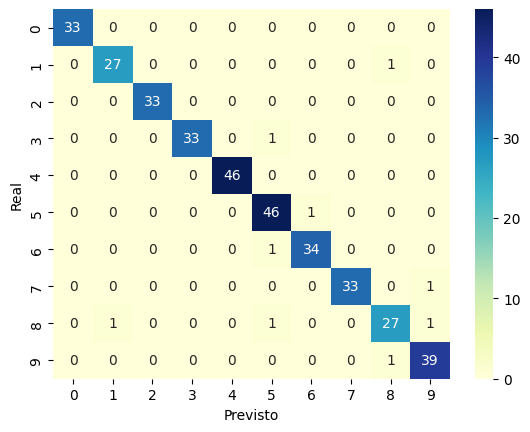

In [15]:
best_model = create_model(neurons1=128, neurons2=128, activation_function='relu')
best_model.fit(X_train, y_train, epochs=20, verbose = 0)
y_pred = np.argmax(best_model.predict(X_test), axis=1)
metricas = metricas_classificacao(y_test, y_pred)

12/12 [==============================] - 0s 5ms/step
Acurácia: 0.9777777777777777
Precisão (macro): 0.976477528020283
Recall (macro): 0.976156654151022
F1-Score (macro): 0.9762163682295044
Matriz de Confusão:


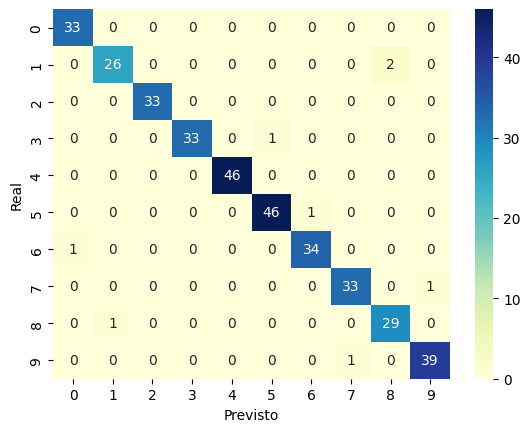

In [16]:
model = create_model(neurons1=64, neurons2=64, activation_function='relu')
model.fit(X_train, y_train, epochs=20, verbose = 0)
y_pred = np.argmax(model.predict(X_test), axis=1)
metricas = metricas_classificacao(y_test, y_pred)

## Random Search

Como difere do Grid Search:

Em vez de testar todas as combinações possíveis, o Random Search testa uma quantidade determinada de combinações aleatórias de hiperparâmetros. Em nosso exemplo anterior de 3x3x2 combinações, em vez de testar todas as 18 combinações, podemos testar, digamos, 10 combinações aleatórias. Isso pode ser mais eficiente quando se tem um espaço de pesquisa muito grande.

In [17]:
from sklearn.model_selection import RandomizedSearchCV

# Definindo o espaço de hiperparâmetros
param_dist = {
    'neurons1': [64, 128, 256, 512],
    'neurons2': [64, 128, 256, 512],
    'activation_function': ['relu', 'tanh', 'softmax']
}

model_for_grid = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)

# Configurando o RandomizedSearchCV com 10 iterações
random_search = RandomizedSearchCV(estimator=model_for_grid, param_distributions=param_dist, n_iter=10, n_jobs=-1, cv=3)

# Iniciando a busca pelos melhores hiperparâmetros usando o conjunto de treinamento
random_result = random_search.fit(X_train, y_train)

# Imprimindo os melhores hiperparâmetros encontrados
print(f"Melhores parâmetros usando RandomizedSearchCV: {random_result.best_params_}")


<ipython-input-17-f04218285d19>:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_for_grid = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Melhores parâmetros usando RandomizedSearchCV: {'neurons2': 64, 'neurons1': 512, 'activation_function': 'relu'}


Ao invés de testarmos 4x4x3 = 48 combinações , testamos 10 combinações aleatórias

12/12 [==============================] - 0s 2ms/step
Acurácia: 0.9805555555555555
Precisão (macro): 0.982681475029036
Recall (macro): 0.981171851719411
F1-Score (macro): 0.9818575875842177
Matriz de Confusão:


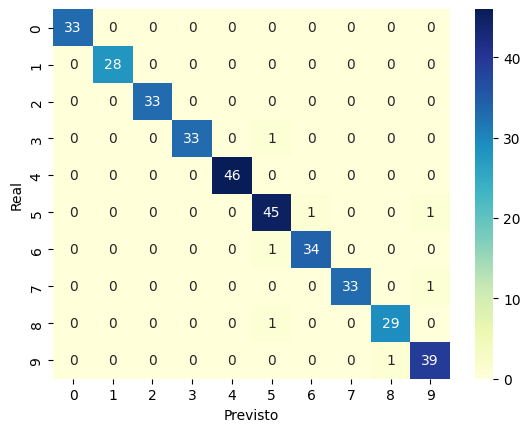

In [18]:
model = create_model(neurons1=128, neurons2=256, activation_function='relu')
model.fit(X_train, y_train, epochs=20, verbose = 0)
y_pred = np.argmax(model.predict(X_test), axis=1)
metricas = metricas_classificacao(y_test, y_pred)

## Otimização Bayesiana com BayesianOptimization
A otimização bayesiana é uma técnica probabilística para encontrar o mínimo de funções. Diferente do Random Search, que faz uma busca aleatória pelo espaço de hiperparâmetros, a otimização bayesiana tenta racionalizar a melhor área do espaço a ser pesquisada com base em avaliações anteriores. Ela usa um processo gaussiano para fazer isso.

### Funcionamento Básico:
Modelo probabilístico: Um modelo probabilístico é construído com base nas funções e seus parâmetros avaliados anteriormente. Esse modelo é frequentemente um processo gaussiano.

Escolha do próximo ponto: Com base no modelo atual, escolhe-se o próximo ponto para avaliar. Isso não é apenas baseado em áreas onde a performance é boa, mas também onde a incerteza é alta. Assim, equilibra a exploração de novas áreas e a exploração de áreas conhecidas.

### Aplicação em Machine Learning:
Para otimização de hiperparâmetros, a função que queremos minimizar (ou maximizar) é geralmente a métrica de erro (ou acurácia) do nosso modelo. Por exemplo, se estamos treinando uma rede neural, a função tomará hiperparâmetros como entrada (como taxa de aprendizado, número de neurônios, etc.) e retornará o erro no conjunto de validação.

In [19]:
!pip install bayesian-optimization

``Função Objetivo``: Precisamos definir a função que queremos otimizar. No nosso caso, essa função irá:
- Receber hiperparâmetros como entrada.
- Construir e treinar um modelo usando esses hiperparâmetros.
- Retornar a métrica de erro (ou acurácia).

``Limites dos Hiperparâmetros``: A otimização bayesiana requer que os hiperparâmetros tenham limites. Se for um hiperparâmetro contínuo (como a taxa de aprendizado), simplesmente definimos um intervalo. Para hiperparâmetros categóricos (como funções de ativação), usamos um truque: mapeamos cada categoria para um número (por exemplo, 'relu' para 0, 'tanh' para 1) e depois usamos esse índice como hiperparâmetro contínuo. Depois, na função objetivo, mapeamos o índice de volta à sua categoria original.

``Otimização``: Com a função objetivo e os limites definidos, podemos executar a otimização. Decidimos quantos pontos iniciais queremos (pontos escolhidos aleatoriamente antes de começar a otimização bayesiana) e quantas iterações de otimização queremos.

In [20]:
# Importando a biblioteca necessária
from bayes_opt import BayesianOptimization

# Definindo a função objetivo que queremos otimizar.
# Esta função treina um modelo com hiperparâmetros fornecidos e retorna a acurácia de validação.
def objective_function(neurons1, neurons2, activation_index):

    # Mapeia os índices para suas respectivas funções de ativação.
    activation_functions = ['relu', 'tanh']
    activation_function = activation_functions[int(activation_index)]

    # Cria e compila o modelo usando os hiperparâmetros fornecidos.
    model = create_model(int(neurons1), int(neurons2), activation_function)

    # Treina o modelo e obtém o histórico de treinamento.
    history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_split=0.2)

    # Obtém a acurácia de validação da última época.
    val_accuracy = history.history['val_accuracy'][-1]

    return val_accuracy

# Definindo os limites dos hiperparâmetros para a otimização bayesiana.
# Os hiperparâmetros contínuos têm intervalos definidos (por exemplo, neurons1 entre 64 e 256).
# Para hiperparâmetros categóricos, usamos índices (por exemplo, activation_index entre 0 e 1).
pbounds = {
    'neurons1': (64, 256),
    'neurons2': (64, 256),
    'activation_index': (0, 1)
}

# Inicializa o otimizador bayesiano com a função objetivo e os limites dos hiperparâmetros.
optimizer = BayesianOptimization(
    f=objective_function,     # Função objetivo definida anteriormente.
    pbounds=pbounds,          # Limites dos hiperparâmetros.
    random_state=1            # Semente para reprodutibilidade.
)

# Executa a otimização bayesiana.
# 'init_points' define quantos pontos iniciais aleatórios serão testados antes da otimização começar.
# 'n_iter' define quantas iterações de otimização serão executadas.
optimizer.maximize(init_points=5, n_iter=10)

# Exibe os melhores hiperparâmetros encontrados.
print(f"Melhores parâmetros usando otimização bayesiana: {optimizer.max['params']}")

|   iter    |  target   | activa... | neurons1  | neurons2  |
-------------------------------------------------------------
| 1         | 0.9688    | 0.417     | 202.3     | 64.02     |
| 2         | 0.9618    | 0.3023    | 92.18     | 81.73     |
| 3         | 0.9792    | 0.1863    | 130.3     | 140.2     |
| 4         | 0.9653    | 0.5388    | 144.5     | 195.6     |
| 5         | 0.9722    | 0.2045    | 232.6     | 69.26     |
| 6         | 0.9792    | 0.3111    | 132.4     | 138.6     |
| 7         | 0.9722    | 0.2066    | 176.0     | 136.0     |
| 8         | 0.9653    | 0.2749    | 87.32     | 155.3     |
| 9         | 0.9757    | 0.0       | 144.7     | 153.4     |
| 10        | 0.9757    | 0.151     | 255.4     | 128.3     |
| 11        | 0.9688    | 0.4735    | 255.2     | 172.3     |
| 12        | 0.9757    | 0.4475    | 255.6     | 97.23     |
| 13        | 0.9826    | 0.1496    | 252.8     | 256.0     |
| 14        | 0.9861    | 0.0       | 222.9     | 256.0     |
| 15    


"'activation_index': 0.48873272287485325:

Este valor contínuo representa a função de ativação selecionada para o modelo. Na implementação, duas funções de ativação ('relu' e 'tanh') foram mapeadas para os índices 0 e 1, respectivamente.
O valor 0.4887 é mais próximo de 0 do que de 1. Portanto, ao arredondar, o índice 0 é selecionado, correspondendo à função de ativação 'relu'.

'neurons1': 225.5063053565966:

Representa o número ideal de neurônios na primeira camada oculta identificado pelo otimizador bayesiano.
Em uma implementação prática, esse número seria arredondado para 226 neurônios na primeira camada oculta.

'neurons2': 251.9811401659988:

Indica o número ideal de neurônios para a segunda camada oculta.
Ao arredondar, resulta em uma segunda camada oculta com 252 neurônios."